#IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#IMPORTING LIBRARIES


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#DATA PREPROCESSING
#TRAINING IMAGE PREPROCESSING

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Junk-Fast Food/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 8000 files belonging to 40 classes.


#VALIDATION IMAGE PREPROCESSING

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Junk-Fast Food/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 800 files belonging to 40 classes.


#BUILDING MODEL

In [ ]:
cnn = tf.keras.models.Sequential()

#BUILDING CONVOLUTION LAYER

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #we are dropping some neuron to avoid overfitting

#Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=40,activation='softmax'))

#Compiling and training phase

In [ ]:
# cnn.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.09), loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer='RMSprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
250/250 [==============================] - 641s 2s/step - loss: 5.8042 - accuracy: 0.0224 - val_loss: 3.6853 - val_accuracy: 0.0338
Epoch 2/50
250/250 [==============================] - 113s 448ms/step - loss: 3.7575 - accuracy: 0.0253 - val_loss: 3.6802 - val_accuracy: 0.0362
Epoch 3/50
250/250 [==============================] - 113s 448ms/step - loss: 3.6914 - accuracy: 0.0371 - val_loss: 3.5671 - val_accuracy: 0.0700
Epoch 4/50
250/250 [==============================] - 115s 455ms/step - loss: 3.6009 - accuracy: 0.0538 - val_loss: 3.4679 - val_accuracy: 0.0838
Epoch 5/50
250/250 [==============================] - 116s 461ms/step - loss: 3.4614 - accuracy: 0.0857 - val_loss: 3.2966 - val_accuracy: 0.1500
Epoch 6/50
250/250 [==============================] - 114s 451ms/step - loss: 3.2424 - accuracy: 0.1360 - val_loss: 2.9618 - val_accuracy: 0.2362
Epoch 7/50
250/250 [==============================] - 114s 454ms/step - loss: 2.8638 - accuracy: 0.2288 - val_loss: 2.6062 - va

#Saving Model

In [ ]:
cnn.save('trained_model_junk_food.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #Return Dictionary

{'loss': [5.8041887283325195,
  3.7574658393859863,
  3.691409111022949,
  3.600928544998169,
  3.4613802433013916,
  3.2423534393310547,
  2.863755464553833,
  2.3416271209716797,
  1.8200072050094604,
  1.375177025794983,
  1.0713863372802734,
  0.8560876250267029,
  0.6899137496948242,
  0.6088550090789795,
  0.5383116602897644,
  0.44482287764549255,
  0.4243336319923401,
  0.40477368235588074,
  0.3729593753814697,
  0.3773322105407715,
  0.3306496739387512,
  0.3314264714717865,
  0.30223676562309265,
  0.30209797620773315,
  0.2766225039958954,
  0.25663939118385315,
  0.263303279876709,
  0.28732210397720337,
  0.2871602773666382,
  0.28663370013237,
  0.27676212787628174,
  0.27208787202835083,
  0.25932368636131287,
  0.29048508405685425,
  0.29309090971946716,
  0.2503419816493988,
  0.30120721459388733,
  0.2861791253089905,
  0.26672127842903137,
  0.2918234169483185,
  0.28137192130088806,
  0.22896307706832886,
  0.2812862992286682,
  0.2946593165397644,
  0.313541680574

###Recording History In JSON

In [ ]:
import json
with open('training_hist_junk_food.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy Of Model Achived On Validation Set

In [ ]:
print("Validation Set Accuracy : {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation Set Accuracy : 71.62500023841858 % 


#Accuracy Visualiation
##Training Visualiation

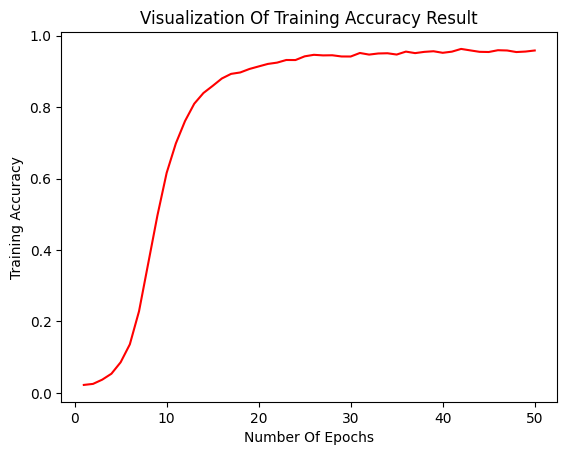

In [ ]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Number Of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization Of Training Accuracy Result')
plt.show()

#Validation Accuracy

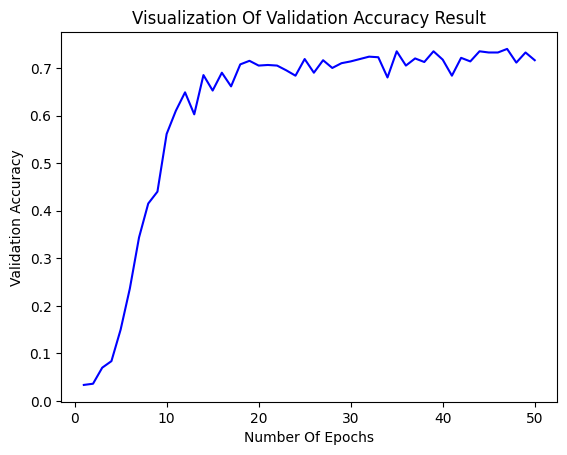

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Number Of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization Of Validation Accuracy Result')
plt.show()

In [ ]:
training_loss, training_accuracy = cnn.evaluate(training_set)

250/250 [==============================] - 48s 188ms/step - loss: 0.0898 - accuracy: 0.9797


In [ ]:
val_loss, val_accuracy = cnn.evaluate(validation_set)

25/25 [==============================] - 4s 119ms/step - loss: 6.4912 - accuracy: 0.7163


###Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Junk-Fast Food/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 387 files belonging to 40 classes.


In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set)

13/13 [==============================] - 138s 3s/step - loss: 19.1240 - accuracy: 0.2558
